In [184]:

import numpy as np
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils

#E(2)-steerable CNNs - librar"y:
from e2cnn import gspaces    
from e2cnn import nn as G_CNN   
import e2cnn

#Plotting in 2d/3d:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse,Rectangle, Circle
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

#Tools:
import datetime
import sys
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sys.path.append('../../')
#Own files:
import Kernel_and_GP_tools as GP
import My_Tools
import EquivDeepSets 
import Equivariance_Tester 
import Training
from Cov_Converter import cov_converter
import Decoder_Models as models
import Architectures
import CNP.CNP_Model as CNP_Model
import EquivCNP
import Tasks.ERA5.ERA5_Dataset as Dataset

#HYPERPARAMETERS and set seed:
torch.set_default_dtype(torch.float)
if torch.cuda.is_available():
    DEVICE = torch.device("cuda:0")  
    print("Running on the GPU")
else:
    DEVICE = torch.device("cpu")
    print("Running on the CPU")

Running on the CPU


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


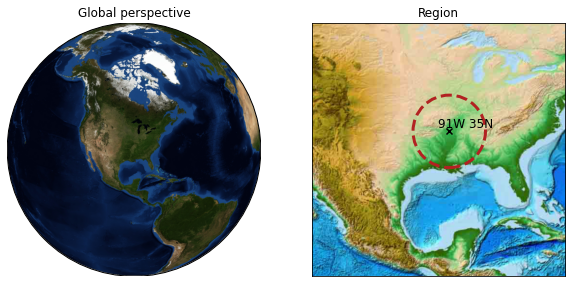

In [185]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
m1 = Basemap(projection='ortho', resolution=None, lat_0=35, lon_0=-90,ax=ax[0])
m1.bluemarble(scale=0.5)
ax[0].set_title('Global perspective')

m_2 = Basemap(llcrnrlon=-110,llcrnrlat=15,urcrnrlon=-75,urcrnrlat=50, resolution=None,ax=ax[1])
m_2.etopo()
circle=Circle((-91.,35), 5, fill=False,linewidth=3,edgecolor='firebrick',linestyle='--')
ax[1].scatter([-91],[35],color='black', marker='x')
ax[1].annotate("91W 35N", xy=(-91,35),xytext=(-92.5,35.5),fontsize='large',color='black')
ax[1].add_patch(circle)

ax[1].set_title('Region')
plt.savefig("ERA5_US_region.pdf",pad_inches=0.,bbox_inches='tight')

In [ ]:
data='small'
if data=='small':
        PATH_TO_TEST_FILE="../../Tasks/ERA5/ERA5_US/Data/Test_Small_ERA5_US.nc"
elif data=='big':
        PATH_TO_TEST_FILE="../../Tasks/ERA5/ERA5_US/Data/Test_Big_ERA5_US.nc"
else:
    sys.exit("Unknown data set.")


In [ ]:
#Set minimum and maximum number of context points:
MIN_N_CONT=2
MAX_N_CONT=50
#Load the data set:
test_dataset=Dataset.ERA5Dataset(PATH_TO_TEST_FILE,MIN_N_CONT,MAX_N_CONT,place='US',normalize=True,circular=True)

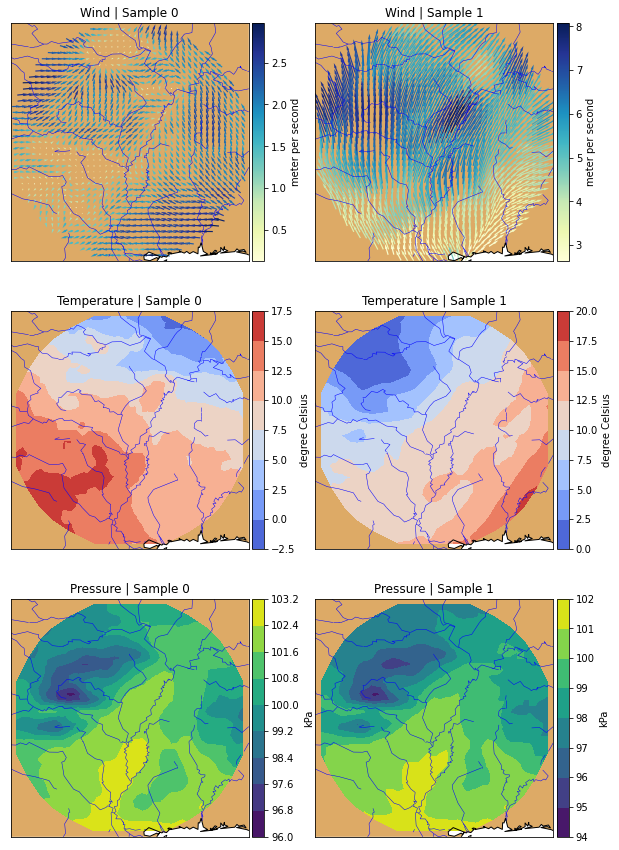

In [237]:
fig, ax=plt.subplots(nrows=3,ncols=2,figsize=(10,15))
scale=6.
for i in range(2):
    X,Y=test_dataset.get_rand_map()
    for j in range(3):
        pass
        m = Basemap(llcrnrlon=-96.,llcrnrlat=30.,urcrnrlon=-86.,urcrnrlat=40., resolution='l',ax=ax[j][i])
        m.fillcontinents(color='#ddaa66',zorder=0)
        m.drawrivers(color='#0000ff')
        m.drawcoastlines()
            
    #width=ax[0][i].get_xlim()[1]-ax[0][i].get_xlim()[0]
    #ax[0][i].set_title("Wind")
    wind_speed=Y[:,[2,3]].norm(dim=1)
    norm = matplotlib.colors.Normalize()
    norm.autoscale(wind_speed)
    cm=plt.cm.YlGnBu

    quiver=ax[0][i].quiver(X[:,0],X[:,1],Y[:,2],Y[:,3],wind_speed,pivot='mid',scale_units='width',scale=width*scale,headlength=4., headwidth = 2.,width=0.005,cmap=cm)
    ax[0][i].set_title("Wind | Sample "+str(i))
    divider = make_axes_locatable(ax[0][i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb=fig.colorbar(quiver, cax=cax)
    cb.set_label(label="meter per second",x=0.)

    tricontour=ax[1][i].tricontourf(X[:,0],X[:,1],Y[:,1],cmap=plt.cm.coolwarm)
    divider1 = make_axes_locatable(ax[1][i])
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    cb1=fig.colorbar(tricontour, cax=cax1)
    cb1.set_label(label="degree Celsius",x=0.)

    ax[1][i].set_title("Temperature | Sample "+str(i))
    tricontour2=ax[2][i].tricontourf(X[:,0],X[:,1],Y[:,0])
    divider2 = make_axes_locatable(ax[2][i])
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    cb2=fig.colorbar(tricontour2, cax=cax2)
    cb2.set_label(label="kPa",x=-0.5)
    ax[2][i].set_title("Pressure | Sample "+str(i))

plt.savefig("ERA5_US_Examples_2.pdf",pad_inches=0.,bbox_inches='tight')


